# Research Questions

In [1]:
# import all packages

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy.stats

## RQ1)
After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [11]:
# import the dataset df_instagram_profiles

df_instagram_profiles = pd.read_csv("~/instagram_profiles.csv", delimiter = "\t")

* #### Dataset df_instagram_profiles description
  * profile_id --> float
  * profile_name --> string
  * firstname_lastname --> string
  * description --> string
  * following --> float
  * followers --> float
  * n_posts --> float
  * url --> string
  * cts --> time
  * is_business_account --> categorial variable bool {False, True}

In [18]:
# Numerical data description

df_instagram_profiles['sid'] = df_instagram_profiles['sid'].astype(str)
df_instagram_profiles['profile_id'] = df_instagram_profiles['profile_id'].astype(str)
df_instagram_profiles = df_instagram_profiles.astype({'following': 'int', 'followers': 'int', 'n_posts': 'int'}, errors = 'ignore')

df_instagram_profiles.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,following,followers,n_posts
count,3452771,3452771,3452771
mean,1406,4740,410
std,8113,193909,1042
min,0,0,0
25%,356,159,22
50%,754,406,120
75%,1573,974,420
max,4191080,285457645,183730


Text(0.5, 1.05, 'Count of followers')

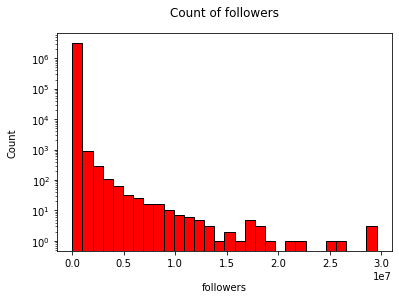

In [111]:
# histograms

# number of followers
followers = df_instagram_profiles['followers']

followers.plot(kind = 'hist', color = 'red', bins = 30, logy = True, ec = 'black')
plt.xlabel("followers", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of followers", y = 1.05)

Text(0.5, 1.05, 'Count of following')

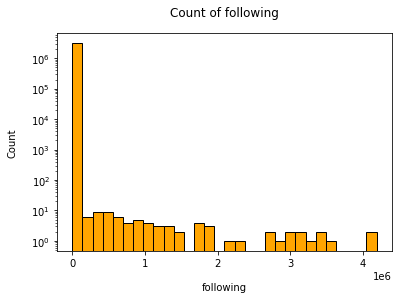

In [116]:
# number of following

following = df_instagram_profiles['following']

following.plot(kind = 'hist', color = 'orange', bins = 30, logy = True, ec = 'black')
plt.xlabel("following", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of following", y = 1.05)

# Despite the log transformation, the data is still strongly skewed to the left

Text(0.5, 1.05, 'Number of posts per Instagram account')

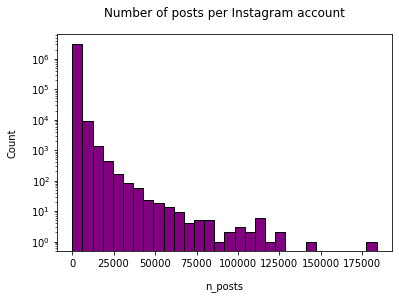

In [110]:
# number of posts

n_posts = df_instagram_profiles['n_posts']

n_posts.plot(kind = 'hist', color = 'purple', bins = 30, logy = True, ec = 'black')
plt.xlabel("n_posts", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Number of posts per Instagram account", y = 1.05)

In [163]:
# Categorical data description

df_instagram_profiles.describe(include = 'all')

# most common name is Sarah


,sid,profile_id,profile_name,firstname_lastname,following,followers,n_posts,cts,is_business_account
count,3130712,3130712.00000,3130712,3130712,3130712.00000,3130712.00000,3130712.00000,3130712,3130712
unique,3130712,NaN,3130198,2631446,NaN,NaN,NaN,3125856,2
top,4184446,NaN,severnieparki,Sarah,NaN,NaN,NaN,2019-07-11 08:55:58.527 -0400,False
freq,1,NaN,4,1943,NaN,NaN,NaN,4,2353131
mean,NaN,3150131064.49193,NaN,NaN,1426.60581,3916.17963,402.61814,NaN,NaN
std,NaN,50978745464.20139,NaN,NaN,8287.95290,86862.69128,1005.49892,NaN,NaN
min,NaN,4.00000,NaN,NaN,0.00000,0.00000,0.00000,NaN,NaN
25%,NaN,274860333.00000,NaN,NaN,365.00000,165.00000,24.00000,NaN,NaN
50%,NaN,1687535342.00000,NaN,NaN,768.00000,409.00000,122.00000,NaN,NaN
75%,NaN,5605473867.50000,NaN,NaN,1603.00000,967.00000,419.00000,NaN,NaN


Text(0.5, 1.05, 'Count of business accounts')

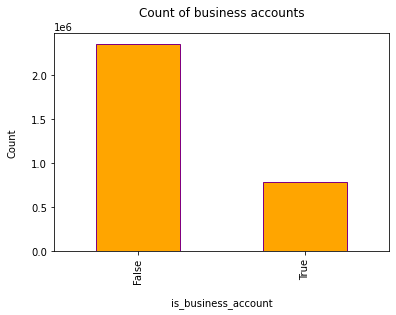

In [114]:
# is_business_account

is_business_account = df_instagram_profiles['is_business_account']
count = is_business_account.value_counts()

count.plot(kind = 'bar', color = 'orange', ec = 'purple')
plt.xlabel("is_business_account", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of business accounts", y = 1.05)

In [2]:
# import the dataset df_instagram_locations

df_instagram_locations = pd.read_csv("~/instagram_locations.csv", delimiter = "\t")

#### Dataset df_instagram_profiles description

* sid --> string
* id  --> string
* name (location's name) --> string
* street --> string
* zip (code) --> string
* city --> string
* region --> string
* cd (country code) --> string
* phone --> string
* aj_exact_city_match --> bool {False, True}
* blurb (description of the place) --> string
* dir_city_name --> string
* dir_city_slug --> string
* dir_country_id --> string
* dir_country_name --> string
* lat (latitute) --> float
* lng (longitute) --> float
* primary_alias_on_fb --> string
* slug --> string
* website --> string
* cts --> string

In [4]:
# Numerical data description

pd.set_option('display.float_format', lambda x: '%.5f' % x)

df_instagram_locations['sid'] = df_instagram_locations['sid'].astype(str)
df_instagram_locations['id'] = df_instagram_locations['id'].astype(str)

df_instagram_locations.describe()

,lat,lng
count,1016495.00000,1016495.00000
mean,-15.29215,34.21718
std,76.15085,22.01081
min,-179.98300,-90.00000
25%,-80.15575,29.97555
50%,-2.45000,40.67820
75%,30.71740,48.84722
max,179.99412,89.99870


Text(0.5, 1.05, 'Latitude distribution')

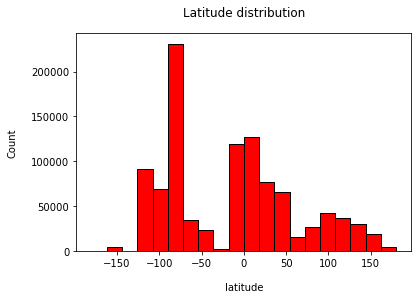

In [9]:
# histograms

# latitude
latitude = df_instagram_locations['lat']

latitude.plot(kind = 'hist', color = 'red', bins = 20, ec = 'black')
plt.xlabel("latitude", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Latitude distribution", y = 1.05)

In [14]:
# most common latitude
latitude.value_counts().idxmax()

37.6156

Text(0.5, 1.05, 'Longitude distribution')

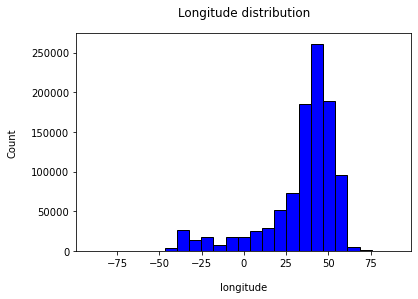

In [15]:
# histograms

# longitude
longitude = df_instagram_locations['lng']

longitude.plot(kind = 'hist', color = 'blue', bins = 25, ec = 'black')
plt.xlabel("longitude", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Longitude distribution", y = 1.05)

In [16]:
# most common longitude
longitude.value_counts().idxmax()

55.7522

Looking at the most common longitude and latitude, the country is Iran

In [159]:
# Categorical data description

df_instagram_locations.describe(include = 'all')

# most commong location name is Starbucks
# most common city is New York
# most common region is eastern province
# most common country code is US
# most common website is http://www.starbucks.com/
# most common ct is 2019-05-25 23:54:48.969


,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
count,1022658,1022658,1022658,715704,715579,937166,1760,939010,601688,1000510,...,495698,495221,495628,495698,1016495.00000,1016495.00000,425531,941668,623262,1022658
unique,1022658,1022658,935776,656262,181474,118541,1743,245,577305,2,...,114996,114426,234,235,NaN,NaN,425486,833398,583671,1022298
top,719981,110296492939207,Starbucks,,10001,"New York, New York",Eastern Province,US,+44 345 748 4950,False,...,"Hells Kitchen, Manhattan",hells-kitchen-manhattan,US,United States,NaN,NaN,pandpnewcastle,-,http://www.starbucks.com/,2019-05-25 23:54:48.969
freq,1,1,1097,1652,1649,29954,4,331424,178,907651,...,1326,1326,170983,170983,NaN,NaN,2,6588,297,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-15.29215,34.21718,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.15085,22.01081,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-179.98300,-90.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-80.15575,29.97555,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.45000,40.67820,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.71740,48.84722,NaN,NaN,NaN,NaN


Text(0.5, 1.05, 'Count of aj_exact_city_match')

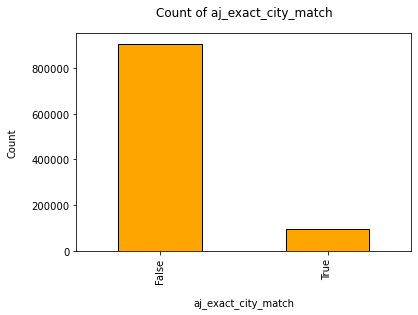

In [161]:
# aj_exact_city_match

aj_exact_city_match = df_instagram_locations['aj_exact_city_match']
count = aj_exact_city_match.value_counts()

count.plot(kind = 'bar', color = 'orange', ec = 'black')
plt.xlabel("aj_exact_city_match", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of aj_exact_city_match", y = 1.05)

## RQ2)
Let's explore the dataset by finding simple insights regarding the profile and posts.

In [3]:
df_instagram_profiles.shape[0] # no. rows = 4,509,586

4509586

In [12]:
# Deal with missing values
df_instagram_profiles.isna().sum() 

# firstname_lastname,
# description,
# following,
# followers,
# n_posts,
# url and
# is_business_account have missing values NaN

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [20]:
# remove the columns that are not useful for our purposes

df_instagram_profiles_RQ2 = df_instagram_profiles.drop(['description', 'url'], axis = 1)
df_instagram_profiles_RQ2.shape[1]

9

In [21]:
# Replace is_business_account missing rows with 'False' values

df_instagram_profiles_RQ2.is_business_account.fillna(False, inplace = True)

In [22]:
# remove all remaining rows containing missing values as they are not useful for our purposes

df_instagram_profiles_RQ2.dropna(axis = 0, how = 'any', inplace = True)
df_instagram_profiles_RQ2.shape[0] # no. rows = 3,130,712

3135298

In [9]:
df_instagram_profiles_RQ2.isna().sum()

sid                    0
profile_id             0
profile_name           0
firstname_lastname     0
following              0
followers              0
n_posts                0
cts                    0
is_business_account    0
dtype: int64

##### a) Plot the number of posts for each profile in descending order

In [23]:
df_instagram_profiles_RQ2.sort_values(by = 'n_posts', ascending = False, inplace = True)

In [27]:
df_instagram_profiles_RQ2.n_posts.astype(int)

3990313    183730
2571453    142428
4338921    126340
3942129    125220
4219642    117262
            ...  
2548300         0
714068          0
3264886         0
3264882         0
3239264         0
Name: n_posts, Length: 3135298, dtype: int64

Text(0.5, 1.05, 'Number of posts sorted')

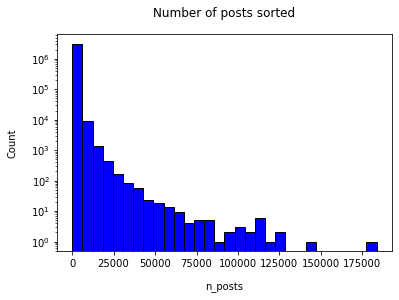

In [12]:
# log transformation histogram

n_posts_sorted = df_instagram_profiles_RQ2['n_posts']

n_posts_sorted.plot(kind = 'hist', color = 'blue', bins = 30, ec = 'black', logy = True)
plt.xlabel("n_posts", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Number of posts sorted", y = 1.05)

##### b) What posts have the highest number of "likes"?

In [2]:
# import the instagram_posts.csv dataset (only the columns that we need for this excercise)

fields = ["numbr_likes", "number_comments"]
df_instagram_posts_RQ2_1 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [19]:
df_instagram_posts_RQ2_1.shape[0] # no. of rows = 42,710,197

42710197

In [4]:
df_instagram_posts_RQ2_1.isna().sum() # only 36 posts have NaN values (we can ignore them)

numbr_likes        36
number_comments    36
dtype: int64

In [3]:
# delete the NaN values

df_instagram_posts_RQ2_1.dropna(axis = 0, how = 'any', inplace = True)

In [4]:
# transform float to integer number

df_instagram_posts_RQ2_1 = df_instagram_posts_RQ2_1.astype({'numbr_likes': 'int', 'number_comments': 'int'}, errors = 'ignore')

In [23]:
most_likes = df_instagram_posts_RQ2_1.sort_values(by = 'numbr_likes', ascending = False).head(10)

In [26]:
most_likes # 165,886

,numbr_likes,number_comments
19624085,8822952,165886
19623988,5447066,25303
19624082,5116398,40608
19623986,4271466,30770
39701024,4264745,18691
6293907,3586546,15405
19624086,3558599,15715
19802016,3533326,59475
30850564,3340297,149489
39812576,3311246,64318


##### c) What posts have the most and the least number of comments?

In [25]:
most_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = False).head(10)
most_comments # 488,953

,numbr_likes,number_comments
41873060,38871,488953
12164781,81523,313997
33261751,54507,257488
11149127,331703,214365
9383817,23515,189888
5427268,129258,180635
25257169,684861,173988
6220011,2224495,170836
31689573,226336,166919
14257307,169791,166198


In [15]:
least_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = True).head(10)
least_comments

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80,0
709,Bx-2z8Hhk1j,29,0
289,Bxr-ibHps7V,25,0
712,Bx5mknNBLCG,35,0
713,Bx3TT5TB3Tu,188,0
286,Bxztf_xlzLh,15,0
714,Bx0fZxkh-_4,134,0
284,Bx65tHPJH2S,18,0
283,ByA02DAl8SZ,19,0
282,ByCqFD-ASgn,9,0


##### d) How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [2]:
# import the instagram_posts.csv dataset (only the columns that we need for this excercise)

fields = ["post_id", "location_id"]
df_instagram_posts_RQ2_3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [23]:
# includes tagged locations means location_name not Nan

count_tagged_location = df_instagram_posts_RQ2_3.loc[df_instagram_posts_RQ2_3['location_id'].notna()].shape[0] # 29,737,425
count_no_tagged_location = len(df_instagram_posts_RQ2_3) - count_tagged_location # 12,972,772

print("The number of posts     containing tagged locations is:", count_tagged_location)
print("The number of posts not containing tagged locations is:", count_no_tagged_location)

The number of posts     containing tagged locations is: 29737425
The number of posts not containing tagged locations is: 12972772


Text(0.5, 1.05, 'Count of tagged & no-tagged locations')

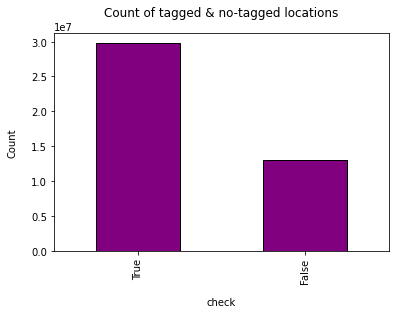

In [112]:
# plot

df_instagram_posts_RQ2_3['check'] = np.where(df_instagram_posts_RQ2_3['location_id'].notna(), True, False)

check = df_instagram_posts_RQ2_3['check']
count = check.value_counts()

count.plot(kind = 'bar', color = 'purple', ec = 'black')
plt.xlabel("check", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of tagged & no-tagged locations", y = 1.05)

##### e) How many posts include only photos? How many also have videos?

In [2]:
# import instagram_posts.cvs (post_id & post_type)

fields = ["post_id", "post_type"]
df_instagram_posts_RQ2_2 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [141]:
# l1: list containing only post_type == 1 (only photos)
l1 = [1]

print("The number of posts that include only photos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l1)].shape[0]) # 41,534,486

The number of posts that include only photos is 41534486


In [143]:
# l1: list containing only post_type == 3 (photos and video)
l2 = [3]

print("The number of posts that include both photos and videos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l2)].shape[0]) # 40,943

The number of posts that include both photos and videos is 40943


##### f) What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [138]:
# Percentage of business accounts & non-business accounts

import os

count_business_accounts = df_instagram_profiles.loc[df_instagram_profiles['is_business_account'] == True].shape[0]
percentage_business_accounts = count_business_accounts/len(df_instagram_profiles)

a = "Percentage of business accounts: " + '{0:.2%}'.format(percentage_business_accounts)
b = "Percentage of non-business accounts: " + '{0:.2%}'.format(1 - percentage_business_accounts)

print(os.linesep.join([a, b])) # 18.97%

Percentage of business accounts: 18.97%
Percentage of non-business accounts: 81.03%


Text(0.5, 1.05, 'Count of business accounts')

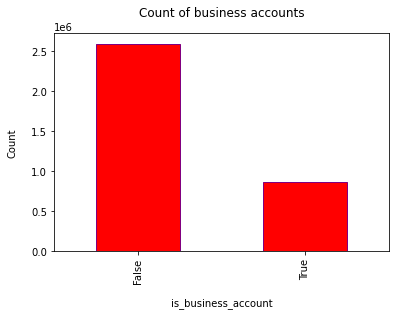

In [65]:
# plot of percentage of business & non-business accounts

is_business_account = df_instagram_profiles['is_business_account']
count = is_business_account.value_counts()

count.plot(kind = 'bar', color = 'red', ec = 'purple')
plt.xlabel("is_business_account", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of business accounts", y = 1.05)

## RQ3

##### a) What is the most common time in which users publish their posts?

In [5]:
# import the instagram_posts.csv dataset (only the columns that we need for this excercise)

fields = ["profile_id", "cts"]
df_instagram_posts_RQ3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [6]:
# Divide dataset into chunks of 5,000,000 rows

chunk_list = []
for i in range(0, len(df_instagram_posts_RQ3), 5000000):
    chunk = df_instagram_posts_RQ3[i:i+5000000]
    chunk_list.append(chunk)

In [7]:
# convert string (object type) to datetime
# Then, get only time from cts (we are not interested in the dates but only in the time)

chunk_list_new = []
for chunk in chunk_list:
    chunk_copy = chunk.copy()
    chunk_copy['cts_time'] = pd.to_datetime(chunk['cts']).dt.time
    chunk_copy['hour'] = pd.to_datetime(chunk['cts']).dt.hour
    chunk_list_new.append(chunk_copy)

In [7]:
# group by cts_time

chunk_list_new1 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('cts_time').size().reset_index(name='counts')
    chunk_list_new1.append(chunk)

In [8]:
# group by hour

chunk_list_new2 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('hour').size().reset_index(name='counts')
    chunk_list_new2.append(chunk)

In [20]:
# Concatenate chunks, group by cts_time (and hour) and add up counts

data  = pd.concat(chunk_list_new1).groupby(['cts_time']).sum().reset_index()
data2 = pd.concat(chunk_list_new2).groupby(['hour']).sum().reset_index()
data2.hour = data2.hour.astype(int)

In [14]:
# the most common time(s) in which users publish their posts

count = data.counts.value_counts(ascending = True).values[0]
data.sort_values(by = 'counts', ascending = False).head(count) # 21:00:09

,cts_time,counts
75609,21:00:09,928


In [21]:
print("The average number of times each cts_time is present in the dataset:", int(np.mean(data.counts)))
print("The median  number of times each cts_time is present in the dataset:", int(np.median(data.counts))) 
print("The maximum number of times each cts_time is present in the dataset:", int(np.max(data.counts)))
print("The minimum number of times each cts_time is present in the dataset:", int(np.min(data.counts)))

The average number of times each cts_time is present in the dataset: 487
The median  number of times each cts_time is present in the dataset: 494
The maximum number of times each cts_time is present in the dataset: 928
The minimum number of times each cts_time is present in the dataset: 223


In [21]:
# the most common hour(s) in which users publish their posts

count2 = data2.counts.value_counts(ascending = True).values[0]
data2.sort_values(by = 'counts', ascending = False).head(count2) # 21:00:09

,hour,counts
19,19,2499758


In [25]:
print("The average number of times each hour is present in the dataset:", int(np.mean(data2.counts)))
print("The median  number of times each hour is present in the dataset:", int(np.median(data2.counts))) 
print("The maximum number of times each hour is present in the dataset:", int(np.max(data2.counts)))
print("The minimum number of times each hour is present in the dataset:", int(np.min(data2.counts)))
print("People post 29% more in the time slot (19:00-19:59) wrt the other time slots")

The average number of times each hour is present in the dataset: 1779452
The median  number of times each hour is present in the dataset: 1779408
The maximum number of times each hour is present in the dataset: 2499758
The minimum number of times each hour is present in the dataset: 1011923
People post 29% more in the time slot (19:00-19:59) wrt the other time slots


##### b) Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [36]:
chunk_list_new2 = []
for chunk in chunk_list:
    chunk_copy = chunk.copy()
    chunk_copy['cts_time'] = pd.to_datetime(chunk['cts']).dt.hour
    chunk_list_new2.append(chunk_copy)

In [47]:
# concatenate the chunks

data2 = pd.concat(chunk_list_new2)

In [59]:
def time_intervals(data, time, time_intervals_list):
    
    time_results = {}
    for slot in time_intervals_list:
        result = len(data[(time >= slot[0]) &
                                  (time <= slot[1])])
        time_results[str(slot)] = result
    
    plt.bar(list(time_results.keys()), time_results.values(), color = 'blue', ec = 'black', width = 0.8)
    plt.xlabel("time slots", labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title("The number of posts for each given interval", y = 1.05)
    plt.show() 

##### c) Use the function that you created in the previous literal to plot the number of posts between the following time intervals.

In [31]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]

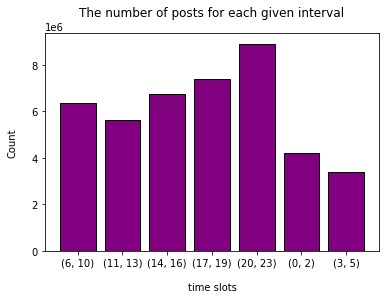

In [46]:
time_intervals(data2, data2.cts_time, slots)

## RQ8)

Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

##### a) Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In [8]:
# dataset containing the instagram_posts's numbr_likes and number_comments columns

df_instagram_posts_RQ8_1 = df_instagram_posts_RQ2_1

In [13]:
# dataset containing the instagram_posts's 

df_instagram_posts_RQ8_2 = pd.concat(chunk_list_new)[['hour']]

Text(0.5, 1.05, 'Scatterplot of number of likes against number of comments')

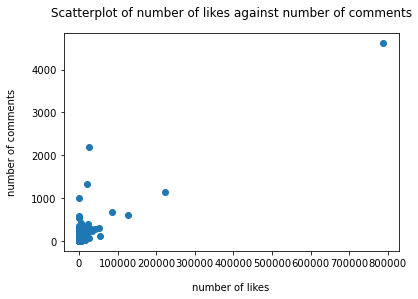

In [9]:
# sample scatterplot 

sample_RQ8 = df_instagram_posts_RQ8_1.head(100000)

plt.scatter(sample_RQ8['numbr_likes'], sample_RQ8['number_comments'])
plt.xlabel("number of likes", labelpad = 14)
plt.ylabel("number of comments", labelpad = 14)
plt.title("Scatterplot of number of likes against number of comments", y = 1.05)

# the plot is squashed by the outliers

In [69]:
print("The maximum number of likes is:", int(max(df_instagram_posts_RQ8['numbr_likes'])))
print("The minimum number of likes is:", int(min(df_instagram_posts_RQ8['numbr_likes'])))
print("The mean    number of likes is:", int(np.mean(df_instagram_posts_RQ8['numbr_likes']))) # mean is influenced
print("The median  number of likes is:", int(np.median(df_instagram_posts_RQ8['numbr_likes'])))

The maximum number of likes is: 3586546
The minimum number of likes is: 0
The mean    number of likes is: 279
The median  number of likes is: 46


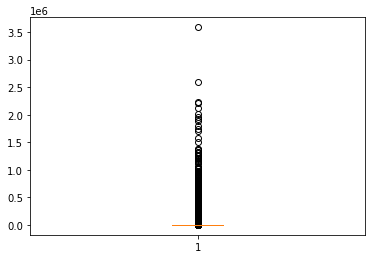

In [68]:
plt.boxplot(df_instagram_posts_RQ8['numbr_likes']);

In [64]:
print("The maximum number of comments is:", int(max(df_instagram_posts_RQ8['number_comments'])))
print("The minimum number of comments is:", int(min(df_instagram_posts_RQ8['number_comments'])))
print("The mean    number of comments is:", int(np.mean(df_instagram_posts_RQ8['number_comments']))) # mean is influenced
print("The median  number of comments is:", int(np.median(df_instagram_posts_RQ8['number_comments'])))

The maximum number of comments is: 189888
The minimum number of comments is: 0
The mean    number of comments is: 7
The median  number of comments is: 1


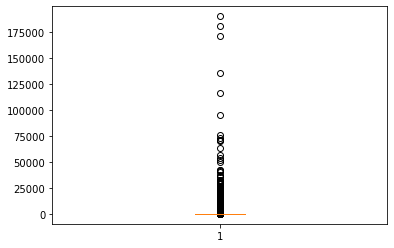

In [66]:
plt.boxplot(df_instagram_posts_RQ8['number_comments']); # the box plots are very squashed => there are many outliers

##### b) Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice

In [15]:
# Let's work in chunks

chunk_list_RQ8_1 = []
for i in range(0, len(df_instagram_posts_RQ8_1), 5000000):
    chunk = df_instagram_posts_RQ8_1[i:i+5000000]
    chunk_list_RQ8_1.append(chunk)
    
chunk_list_RQ8_2 = []
for i in range(0, len(df_instagram_posts_RQ8_2), 5000000):
    chunk = df_instagram_posts_RQ8_2[i:i+5000000]
    chunk_list_RQ8_2.append(chunk)

In [20]:
chunk_list_RQ8_3 = []
for i in range(0, len(df_instagram_posts_RQ8_2), 5000000):
    chunk = pd.concat([df_instagram_posts_RQ8_2[i:i+5000000], df_instagram_posts_RQ8_1[i:i+5000000]], axis = 1)
    chunk_list_RQ8_3.append(chunk)

In [27]:
# Let's group our dataset by hour and compute the average number of likes and comments

df_instagram_posts_RQ8_grouped = pd.concat(chunk_list_RQ8_3).groupby('hour', as_index=False).mean()
df_instagram_posts_RQ8_grouped.hour = df_instagram_posts_RQ8_grouped.hour.astype(int)

In [28]:
# Let's look at the correlation between the three variables

print("The correlation coefficient is:", df_instagram_posts_RQ8_grouped.corr())

# 43.4% moderate (positive) correlation => implying that 
# if a post has a high (low) number of comments it will likely have a high (low) number of likes

The correlation coefficient is:                      hour  numbr_likes  number_comments
hour             1.000000     0.514339         0.279257
numbr_likes      0.514339     1.000000         0.804829
number_comments  0.279257     0.804829         1.000000


##### Correlation results comments

hour and numbr_likes have a moderate-strong positive correlation (51.4%)
hour and number_comments have a weak-moderate positive correlation (27.9%)
The time in which you post is more correlated to the number of likes wrt the number of comments a post gets.
We can also see that the number of likes and the number of comments are strongly correlated.

In [29]:
# Simple linear regression
# time ~ number_likes
# time ~ number_comments

number_likes = df_instagram_posts_RQ8_grouped.numbr_likes
number_comments = df_instagram_posts_RQ8_grouped.number_comments
time = df_instagram_posts_RQ8_grouped.hour

result = scipy.stats.linregress(number_likes, time)
result2 = scipy.stats.linregress(number_comments, time)

In [30]:
print("The p-value for model 1 is:", result.pvalue)
print("the p-value for model 2 is:", result2.pvalue) # p-value == 0.0 implying that number_comments is statistically significant in predicting number_likes and viceversa 

# the number of likes is significant while the number of comments is not

The p-value for model 1 is: 0.010129899606811663
the p-value for model 2 is: 0.18633045092180706


##### <b>Linear Regression comments</b>

According to the p-value for the two models, there seems to be a <b>significant relationship between the time a user posts and the number of likes the post gets</b>. In fact, the p-value = 0.01 < 0.05. On the contrary, there is no significant relationship between the time a user posts and the number of comments as the p-value = 0.19 > 0.05. 
We can also point out that the correlation between time and number_likes is approximately twice as big as the correlation between time and number_comments.

## Bonus Points

##### a) Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

In [40]:
# First let's divide instagram_profile.csv into two subsets (10% top followers and the rest)

df_instagram_profiles_bp = df_instagram_profiles.copy()

top10_followers = df_instagram_profiles_bp.sort_values(by = 'followers', ascending = False).head(int(0.1*len(df_instagram_profiles_bp)))

In [41]:
rest_followers = df_instagram_profiles_bp.sort_values(by = 'followers', ascending = False)

rest_followers = rest_followers.iloc[len(top10_followers):]

In [42]:
# get instagram_posts dataset and group by profile id and average across hour (time)

chunk_list_new3 = []
for chunk in chunk_list_new:
    chunk = chunk.groupby('profile_id', as_index=False)['hour'].agg({'hours_sum': 'sum'})
    chunk_list_new3.append(chunk)
    
data3 = pd.concat(chunk_list_new3).groupby('profile_id', as_index=False)['hours_sum'].sum()

In [43]:
# get instagram_posts dataset and group by profile id and average across hour (time)

chunk_list_new4 = []
for chunk in chunk_list_new:
    chunk = chunk.groupby('profile_id', as_index=False)['profile_id'].agg({'profile_id_count': 'count'})
    chunk_list_new4.append(chunk)
    
data4 = pd.concat(chunk_list_new4).groupby('profile_id', as_index=False)['profile_id_count'].sum()

In [44]:
# Concatenate the datasets 

df_bp_1 = pd.concat([data3, data4['profile_id_count']], axis = 1)

In [45]:
# Create a new column containing the average hour 

df_bp_1['average_hour'] = df_bp_1['hours_sum']/df_bp_1['profile_id_count']

##### Time interval distribution regarding the top 10% users with the highest number of followers

In [47]:
# Let's start with top10 followers

top10_followers.isna().sum() 
top10_followers.dropna(subset = ['profile_id'], inplace = True)

In [49]:
# keep only profile ids that are in both datasets

top10_followers_merged = pd.merge(top10_followers, df_bp_1, on='profile_id', how='inner')

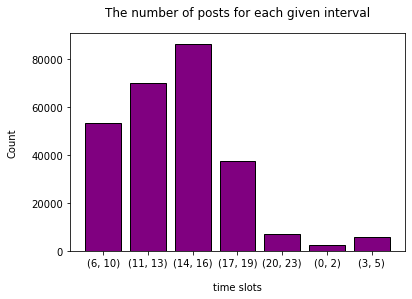

In [60]:
time_intervals(top10_followers_merged, top10_followers_merged.average_hour, slots)

##### Time interval distribution regarding the remaining 90% of users

In [48]:
# Rest 90% of profile ids

rest_followers.dropna(subset = ['profile_id'], inplace = True)

# keep only profile ids that are in both datasets

rest_followers_merged = pd.merge(rest_followers, d3, on='profile_id', how='inner')

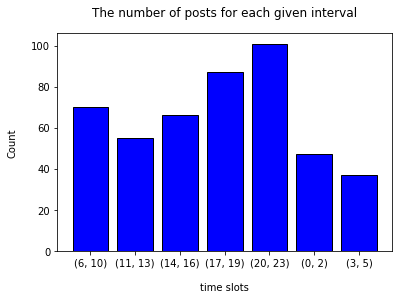

In [63]:
time_intervals(rest_followers_merged, rest_followers_merged.average_hour, slots)

##### Conclusions

It can clearly be seen that the distribution of the time intervals for the bottom 90% Instagram users in terms of number of followers (rest_followers) is similar to the one obtained in question RQ3. This could be explained by the fact that the majority (90%) of the dataset used in questin RQ3 is also present in rest_followers.

While the distribution of the time intervals for the top 10% Instagram users (top10_followers) is very different wrt the one obtained in question RQ3. The histogram is far more skewed to the left, implying that the most followed users tend to post earlier in the day (6 AM - 4 PM) and especially in the 2PM-4PM slot instead of in the evening (5PM-11PM) like the majority of the sampled Instagram users.
So, if you want to be more successful on Instagram, you should post in the morning and early afternoon!